# Implémentation d'un réseau de neurones pour la tâche de classification multi-labels des genres musicaux

In [1]:
import os
import sys
project_dir = os.getcwd().split('notebooks')[0]
sys.path.append(project_dir)

## Importation de modules utiles

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from src.models.NN.NN import *
from src.models.NN.dataset import TrackDataset
from torch.utils.data import DataLoader
from src.utils.tools import load_json

## Chargement et formatage des données

Nous commençons par charger les données.

In [3]:
df = pd.read_parquet(os.path.join(project_dir,"dataset2.parquet"), engine="pyarrow")
df.head()

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,rap,jazz,electronic,african,country,song_index,audio_features,usage_features,artist_name,song_title
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,195,"[0.7089933156967163, -0.6799708008766174, -0.3...","[-0.008137362965188247, -0.004262254068607103,...",Miles Davis,Générique
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,417,"[-0.19785162806510925, 0.023803016170859337, 0...","[0.00041993208544090015, 0.0001525178585704480...",Spin Doctors,Two Princes
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,530,"[-0.14142198860645294, 0.26422423124313354, 0....","[-0.009766703341977859, 0.0019064089803134893,...",Justin Bieber,One Less Lonely Girl
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,909,"[-0.07582522183656693, -0.42076417803764343, -...","[0.005023148381526522, 0.010775540737929749, 0...",Paul McCartney,My Love
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1257,"[-0.16135981678962708, -0.07056394964456558, -...","[0.00517276708433931, 0.006723451311827004, 0....",Jackson 5,Dancing Machine


## Un premier modèle : MLP simple à une couche cachée

Nous commençons par utiliser deux architectures neuronales très simple que nous avons implémenté, l'une prenant en entrée les *audio features* et l'autre les *usage features*. 

Commençons par décrire le premier réseau de neurones : AudioNet1 prenant en entrée les *audios features*. Ce réseau de neurones prend en entrée un tenseur de dimension 256. Il produit en sortie un tenseur de taille 22 (le nombre de classes) qui indique les scores d'appartenance à chaque classe pour chaque track musical (en utilisant une fonction d'activation sigmoide). Cette première architecture est composée d'une seule couche cachée composée de 22 neurones.

#### Chargement des données de configuration

In [4]:
config = load_json(os.path.join(project_dir, "src/models/NN/config.json"))

#### Initialisation du device

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Initialisation du modèle

In [6]:
model = AudioNet1()  # initialize the neural network
model.to(device=device)

AudioNet1(
  (fc1): Linear(in_features=256, out_features=21, bias=True)
)

#### Paramètres du modèle

In [7]:
lr = config['lr']
epochs = config['epochs']
batch_size = config['batch_size']
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()

#### Chargement des données

In [8]:
train_data = TrackDataset(df, train=True, test=False)
valid_data = TrackDataset(df, train=False, test=False)

Number of training features: 42977
Number of validation features: 7585


In [9]:
# train data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
# validation data loader
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)

In [10]:
# start the training and validation
train_loss = []
valid_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch + 1} of {epochs}")
    train_epoch_loss = train(model, train_loader, optimizer, criterion, train_data, device, audio_bool=1)
    valid_epoch_loss = validate(model, valid_loader, criterion, valid_data, device, audio_bool=1)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {valid_epoch_loss:.4f}')

Epoch 1 of 20
Training


1344it [00:03, 386.06it/s]                          


Validating


234it [00:00, 735.20it/s]                         


Train Loss: 0.2742
Val Loss: 0.1764
Epoch 2 of 20
Training


1344it [00:03, 401.96it/s]                          


Validating


234it [00:00, 711.90it/s]                         


Train Loss: 0.1613
Val Loss: 0.1522
Epoch 3 of 20
Training


1344it [00:03, 380.15it/s]                          


Validating


234it [00:00, 932.98it/s]                         


Train Loss: 0.1463
Val Loss: 0.1429
Epoch 4 of 20
Training


1344it [00:03, 384.60it/s]                          


Validating


234it [00:00, 722.39it/s]                         


Train Loss: 0.1393
Val Loss: 0.1378
Epoch 5 of 20
Training


1344it [00:03, 378.54it/s]                          


Validating


234it [00:00, 720.10it/s]                         


Train Loss: 0.1351
Val Loss: 0.1345
Epoch 6 of 20
Training


1344it [00:03, 381.24it/s]                          


Validating


234it [00:00, 891.52it/s]                         


Train Loss: 0.1326
Val Loss: 0.1323
Epoch 7 of 20
Training


1344it [00:03, 386.92it/s]                          


Validating


234it [00:00, 966.20it/s]                         


Train Loss: 0.1304
Val Loss: 0.1305
Epoch 8 of 20
Training


1344it [00:03, 386.84it/s]                          


Validating


234it [00:00, 970.48it/s]                         


Train Loss: 0.1289
Val Loss: 0.1292
Epoch 9 of 20
Training


1344it [00:03, 376.05it/s]                          


Validating


234it [00:00, 929.83it/s]                          


Train Loss: 0.1276
Val Loss: 0.1282
Epoch 10 of 20
Training


1344it [00:03, 377.07it/s]                          


Validating


234it [00:00, 690.33it/s]                         


Train Loss: 0.1266
Val Loss: 0.1273
Epoch 11 of 20
Training


1344it [00:03, 369.84it/s]                          


Validating


234it [00:00, 964.03it/s]                         


Train Loss: 0.1258
Val Loss: 0.1265
Epoch 12 of 20
Training


1344it [00:03, 386.41it/s]                          


Validating


234it [00:00, 763.07it/s]                         


Train Loss: 0.1251
Val Loss: 0.1258
Epoch 13 of 20
Training


1344it [00:03, 372.53it/s]                          


Validating


234it [00:00, 983.97it/s]                         


Train Loss: 0.1246
Val Loss: 0.1252
Epoch 14 of 20
Training


1344it [00:03, 379.55it/s]                          


Validating


234it [00:00, 959.38it/s]                         


Train Loss: 0.1239
Val Loss: 0.1247
Epoch 15 of 20
Training


1344it [00:03, 383.11it/s]                          


Validating


234it [00:00, 992.30it/s]                         


Train Loss: 0.1235
Val Loss: 0.1243
Epoch 16 of 20
Training


1344it [00:03, 371.02it/s]                          


Validating


234it [00:00, 889.79it/s]                         


Train Loss: 0.1231
Val Loss: 0.1239
Epoch 17 of 20
Training


1344it [00:03, 390.72it/s]                          


Validating


234it [00:00, 723.87it/s]                         


Train Loss: 0.1226
Val Loss: 0.1236
Epoch 18 of 20
Training


1344it [00:03, 369.05it/s]                          


Validating


234it [00:00, 731.54it/s]                         


Train Loss: 0.1224
Val Loss: 0.1232
Epoch 19 of 20
Training


1344it [00:03, 374.00it/s]                          


Validating


234it [00:00, 783.26it/s]                         


Train Loss: 0.1219
Val Loss: 0.1228
Epoch 20 of 20
Training


1344it [00:03, 396.37it/s]                          


Validating


234it [00:00, 712.40it/s]                         

Train Loss: 0.1216
Val Loss: 0.1226


In [11]:
torch.save({
        'epoch': epochs,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': criterion,}, os.path.join(project_dir, 'best-checkpoint.pth'))

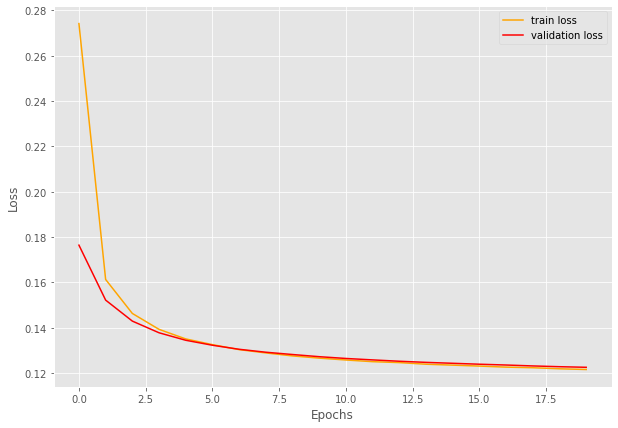

In [13]:
# plot and save the train and validation graphs
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(valid_loss, color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(project_dir,'loss.png'))
plt.show()